In [4]:
!pip install livelossplot

In [5]:
from numpy import *
from keras.models import Sequential
from keras import layers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

## Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
dataset = loadtxt('/content/drive/MyDrive/Neural Network/dataset/diabetes_data.csv', delimiter=',')

In [30]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [31]:
dataset.shape

(768, 9)

#### Bagi Dataset 70% untuk Train dan 30% untuk Test

In [8]:
######## load the dataset #########
train = 0.7

X = dataset[:,0:8] #Input Variables (X):
n_train = round(len(X)*train)

Xtrain = X[0:n_train,:]
Xtest  = X[n_train:,:]

y = dataset[:,-1] #Output Variables (y):
ytrain = y[0:n_train]
ytest  = y[n_train:]

#1. Number of times pregnant
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. Diastolic blood pressure (mm Hg)
#4. Triceps skin fold thickness (mm)
#5. 2-Hour serum insulin (mu U/ml)
#6. Body mass index (weight in kg/(height in m)^2)
#7. Diabetes pedigree function
#8. Age (years)
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

## Pembuatan Model

In [32]:
model = Sequential()

# 1st hidden layer has 12 nodes and uses the ReLU activation function
model.add(layers.Dense(12, input_dim=8, activation='relu'))
# 2nd hidden layer has 8 nodes and uses the ReLU activation function
model.add(layers.Dense(8, activation='relu'))
# output layer has one node and uses the sigmoid activation function
model.add(layers.Dense(1, activation='sigmoid')) # example of "binary classification"

## Ambil bobot init

In [33]:
bobot_layer1 = model.layers[0].get_weights()[0]
bias_layer1  = model.layers[0].get_weights()[1]

bobot_layer2 = model.layers[1].get_weights()[0]
bias_layer2  = model.layers[1].get_weights()[1]

bobot_layer3 = model.layers[2].get_weights()[0]
bias_layer3  = model.layers[2].get_weights()[1]

In [35]:
model.summary() # summarize a model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Proses Training

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.fit(X, y, epochs=150, batch_size=10)
model.fit(Xtrain, ytrain, epochs=100, verbose=1)
#model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7850
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7826
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7636
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7500
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7749
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7621
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7648
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7605
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7576
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7642
Epoch 11/

In [13]:
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=150, verbose=0)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plot training history

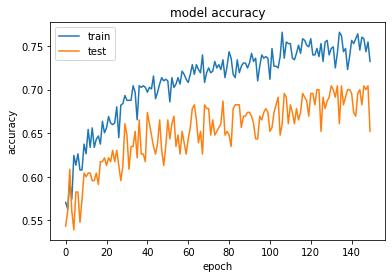

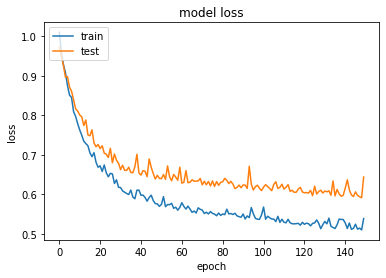

In [14]:
# summarize history for accuracy
# We can see that the model could probably be trained a little more
# as the trend for accuracy on both datasets is still rising for the last few epochs.
# We can also see that the model has not yet over-learned the training dataset,
# showing comparable skill on both datasets.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
# We can see that the model has comparable performance on both train
# and validation datasets (labeled test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
##################################################################

# make class predictions with the model ##
#Xnew = loadtxt('diabetes_newdata.csv', delimiter=',', dtype='str')
#ynew = model.predict_classes(Xnew)

#for i in range(len(Xnew)):
    #print("X=%s, Predicted=%d" % (Xnew[i], ynew[i]))
###########################################

## Buat prediksi

In [42]:
# make class predictions with the model ##
ytrain_pred = model.predict_classes(Xtrain)
ytest_pred  = model.predict_classes(Xtest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
ytrain_pred.flatten()

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [17]:
ytest_pred.flatten()

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

## Perhitungan Akurasi

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,ytrain_pred)

array([[247, 102],
       [ 46, 143]])

In [19]:
tn, fp, fn, tp = confusion_matrix(ytrain,ytrain_pred).flatten()
print('TN: ',tn,'FP: ',fp,'FN: ',fn,'TP: ',tp)

TN:  247 FP:  102 FN:  46 TP:  143


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,ytrain_pred)

0.724907063197026

In [21]:
accuracy_score(ytest,ytest_pred)

0.6521739130434783

### Save model

In [51]:
model.save('/content/drive/MyDrive/Neural Network/Model/BPNN') #save model

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Neural Network/Model/BPNN/assets


### Load Model

In [27]:
from keras.models import load_model
model_new = load_model('/content/drive/MyDrive/Neural Network/Model/BPNN') #load model

In [53]:
model_new.predict_classes(Xtrain).flatten()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,